In [27]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

Создадим соединение с базой данных

In [28]:
connection = sqlite3.connect("../data/checking-logs.sqlite")

Создадим два графика (гистограммами) на одной фигуре с помощью matplotlib, оба графика имеют одинаковые оси и интервалы для удобства сравнения, названия осей и заголовки к графикам:
- Первый график должен отображать распределение количества лаб, сданных пользователями из контрольной группы.
- Второй график должен отображать распределение количества лаб, сданных пользователями из тестовой группы.

Сохраним гистограмму в файл

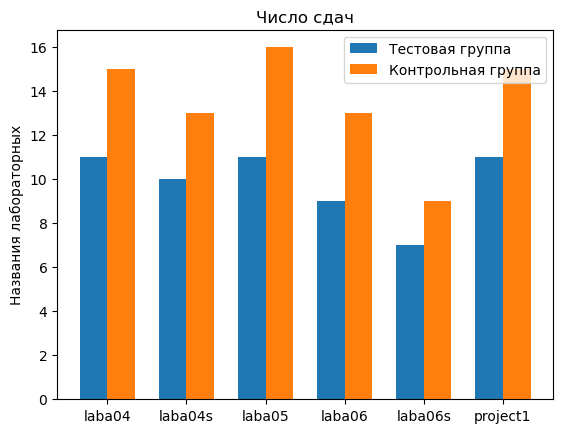

In [29]:
fig, ax = plt.subplots()
width = 0.35  

tmp_table_1 = pd.read_sql("SELECT labname, COUNT(labname) as count FROM test GROUP BY labname", connection)
tmp_table_2 = pd.read_sql("SELECT labname, COUNT(labname) as count FROM control GROUP BY labname", connection)

unique_names = list(tmp_table_1['labname'])
find_count_1, find_count_2 = list(tmp_table_1['count']), list(tmp_table_2['count'])

x = range(len(unique_names))
ax.bar([i - width/2 for i in x], find_count_1, width, label='Тестовая группа')
ax.bar([i + width/2 for i in x], find_count_2, width, label='Контрольная группа') 

ax.set_ylabel('Названия лабораторных')
ax.set_title('Число сдач')

ax.set_xticks(x)
ax.set_xticklabels(unique_names)

ax.legend()
plt.savefig('lab_activity.png')

Закроем соединение

In [30]:
connection.close()